<a href="https://colab.research.google.com/github/mahsabargahi/google-colab/blob/main/Part2_logisticreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn # in case you need to upgrade sklearn

     |████████████████████████████████| 23.1 MB 5.0 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
## mount the Google drive to get access to files in your drive ##
from google.colab import drive
drive.mount('/content/drive')

## set the folder that stores your files and data as your current directory ##
%cd /content/drive/My\ Drive/Colab\ Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
## import libraries and tools ##

import numpy as np # linear algebra
import pandas as pd # data processing and CSV file I/O 

import seaborn as sns

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno  # missing data visualization

import scipy as sp
from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.stattools as smt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## read the dataset in csv format ##
df = pd.read_csv('Data/Concrete_dft.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,dft
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0


In [ ]:
## data frame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   dft               1030 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 72.5 KB


In [ ]:
# separate the feature data X from the response data y
X = df.iloc[:,:-1] # all columns except for the last column
y = df.iloc[:,-1] # the last column is the response variable

In [ ]:
## split the dataset into training and testing datasets using a 80%-20% randomized split ##
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state=15)

Logistic Regression

In [ ]:
# fit a logistic regression model
logr=LogisticRegression(multi_class='multinomial')
#logr=LogisticRegression(multi_class='ovr')
logr_model=logr.fit(X_train,y_train)


In [ ]:
# beta_0
logr_model.intercept_

array([0.00024013])

In [ ]:
# beta_1,...,beta_8
logr_model.coef_

array([[-0.01362497, -0.00930874, -0.00584892,  0.02352871, -0.02227464,
         0.00133979,  0.00036161, -0.08067099]])

In [ ]:
# testing accuracy
logr_model.score(X_test,y_test)

0.8786407766990292

In [ ]:
# prediction on training dataset
y_train_pred = logr_model.predict(X_train)
p_train_pred = logr_model.predict_proba(X_train)

In [ ]:
# prediction on testing dataset
y_test_pred = logr_model.predict(X_test)
p_test_pred = logr_model.predict_proba(X_test)

In [ ]:
# classes
logr_model.classes_

array([0, 1])

In [ ]:
# [p_0, p_1] # if y_test_pred[i]=1 if p_1>p_2, otherwise y_test_pred[i]=0
logr_model.predict_proba(X_test)

array([[9.99827386e-01, 1.72614403e-04],
       [1.46563126e-01, 8.53436874e-01],
       [9.97859530e-01, 2.14046989e-03],
       [1.00000000e+00, 1.09705863e-24],
       [8.88688886e-01, 1.11311114e-01],
       [4.10945943e-02, 9.58905406e-01],
       [9.99864506e-01, 1.35493721e-04],
       [9.99988228e-01, 1.17722853e-05],
       [9.45419619e-01, 5.45803814e-02],
       [1.10490209e-01, 8.89509791e-01],
       [1.00000000e+00, 4.21149771e-25],
       [9.00394634e-01, 9.96053660e-02],
       [9.99899220e-01, 1.00780137e-04],
       [9.98593617e-01, 1.40638287e-03],
       [3.68199923e-03, 9.96318001e-01],
       [9.76407558e-01, 2.35924423e-02],
       [9.99990720e-01, 9.27954271e-06],
       [9.99999512e-01, 4.88024165e-07],
       [9.31367058e-01, 6.86329418e-02],
       [9.93253625e-01, 6.74637457e-03],
       [5.22980396e-01, 4.77019604e-01],
       [1.96273246e-01, 8.03726754e-01],
       [9.97939630e-01, 2.06036978e-03],
       [1.02701133e-01, 8.97298867e-01],
       [9.904891

In [ ]:
# confusion matrix
cnf_matrix=metrics.confusion_matrix(y_test, y_test_pred)

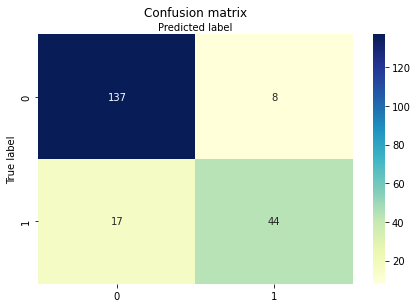

In [ ]:
# visualize confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()